In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

In [4]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [6]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [7]:
df.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

<Axes: >

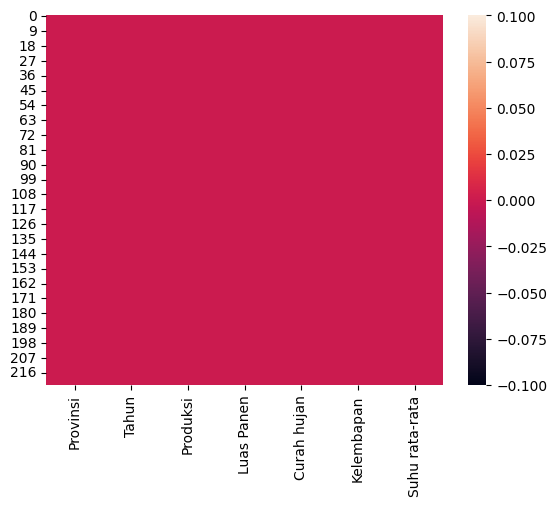

In [8]:
sns.heatmap(df.isnull())

<Axes: >

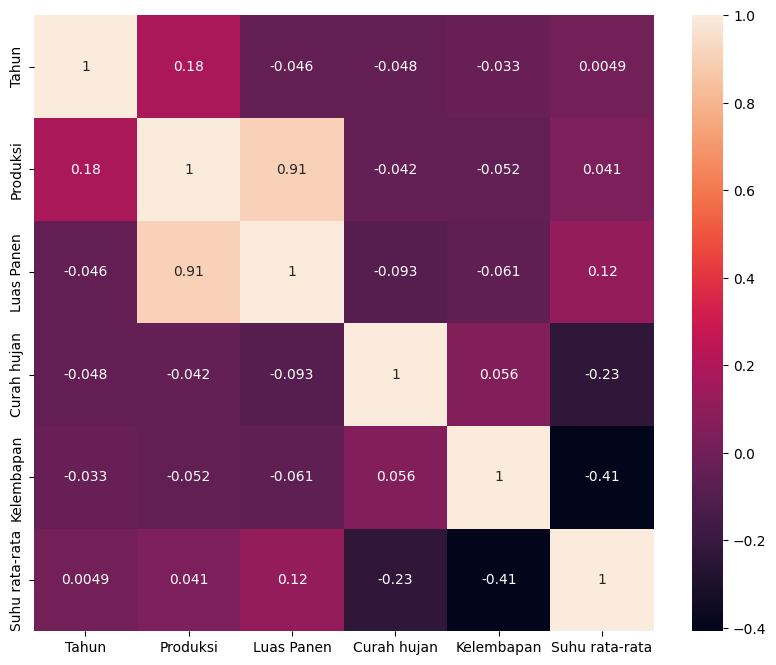

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

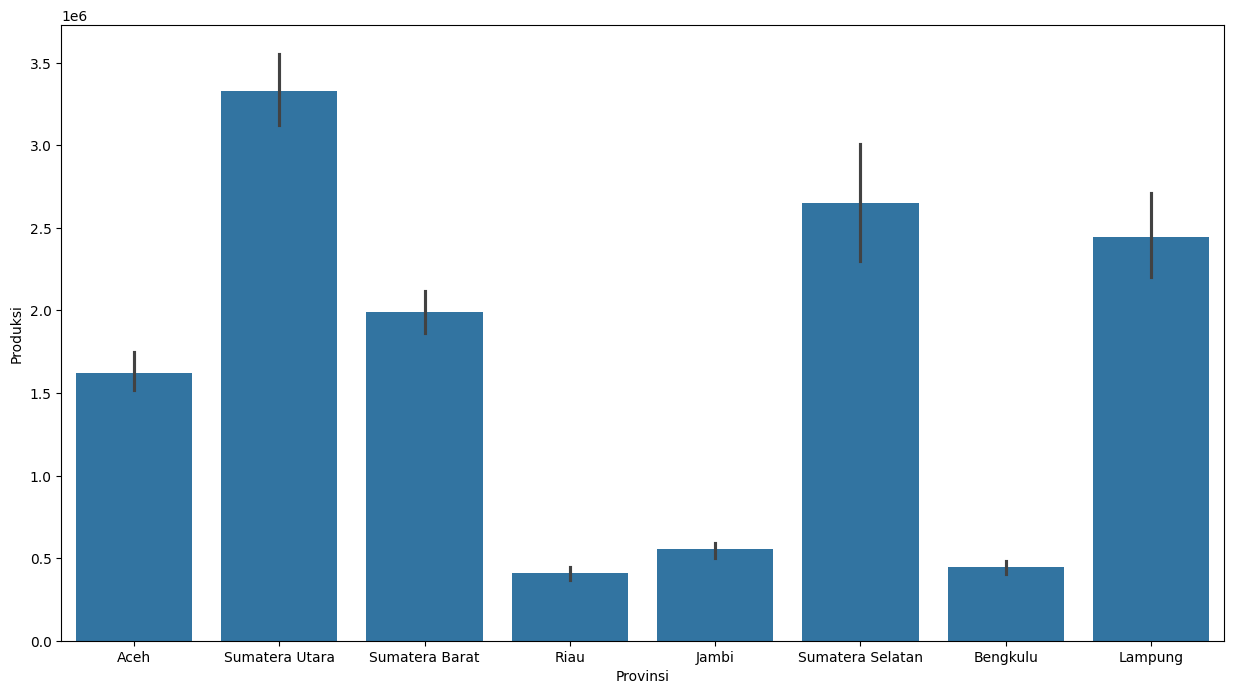

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi', y='Produksi', data=df)
plt.show()

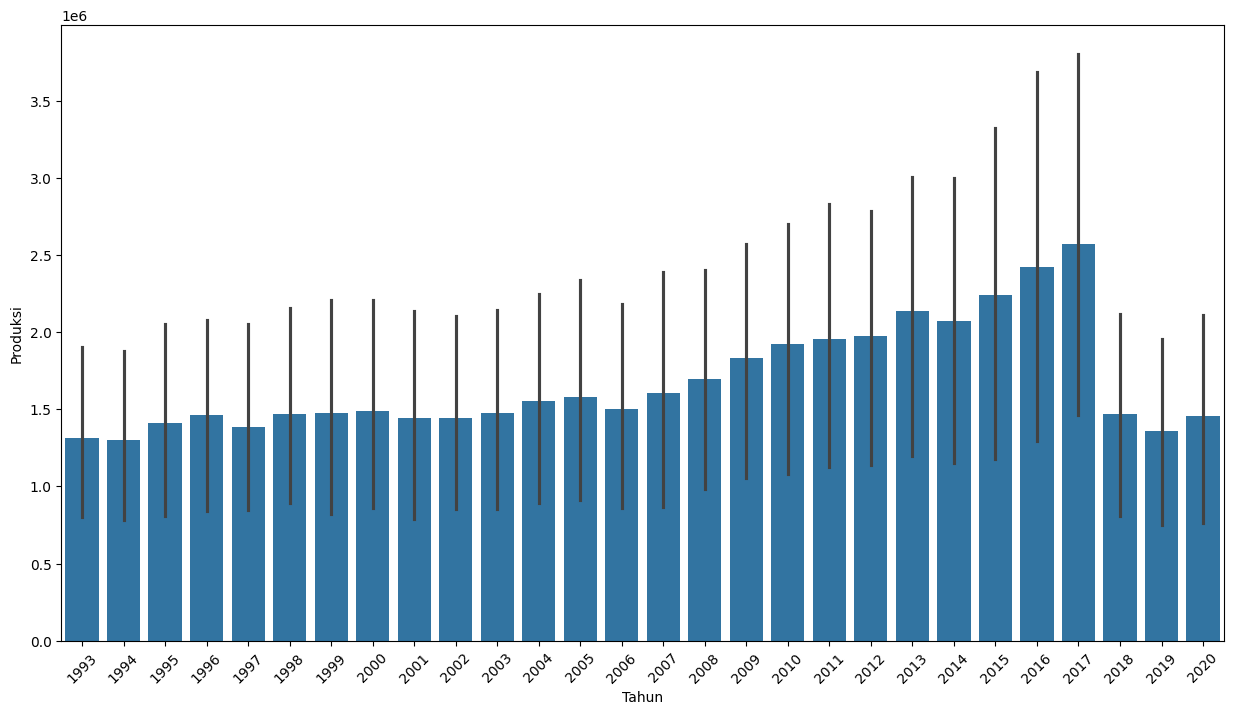

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=df)
plt.xticks(rotation=45)
plt.show()

In [12]:
df = df.drop(['Provinsi','Tahun'], axis=1)

In [13]:
features = ['Luas Panen', 'Curah hujan','Kelembapan', 'Suhu rata-rata']
x = df[features]
y = df['Produksi']
x.shape, y.shape

((224, 4), (224,))

In [14]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

In [15]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [16]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8663623649914515


In [17]:
input_data = np.array([[348223.0, 1557.0, 83.00, 26.08]])
prediction = lr.predict(input_data)
print('Estimasi Hasil Panen Padi :', prediction)

Estimasi Hasil Panen Padi : [1545085.92141251]


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import pickle

filename = 'estimasi-hasil-panen-padi.sav'
pickle.dump(lr,open(filename,'wb'))